[*********************100%***********************]  1 of 1 completed


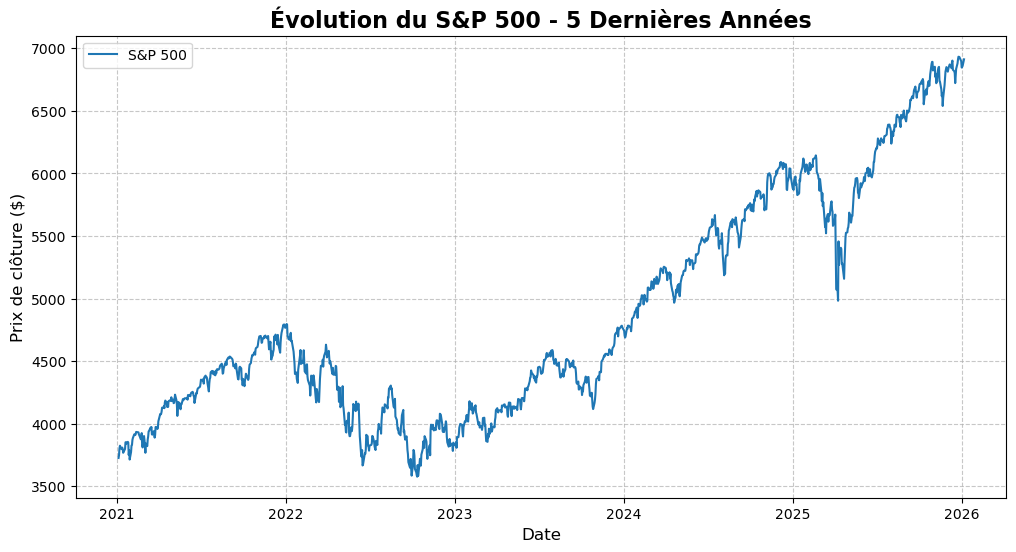

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. EXTRACTION (ETL) ---
# Le ticker Yahoo Finance pour le S&P 500 est "^GSPC"
sp500 = yf.download(tickers="^GSPC", period="5y", interval="1d")

# --- 2. TRANSFORMATION ---
# On s'assure de n'avoir aucune valeur vide
data_clean = sp500['Close'].dropna()

# --- 3. VISUALISATION ---
plt.figure(figsize=(12, 6)) # Taille de l'image

# Création de la courbe
plt.plot(data_clean.index, data_clean.values, label='S&P 500', color='#1f77b4', linewidth=1.5)

# Mise en forme du graphique
plt.title("Évolution du S&P 500 - 5 Dernières Années", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Prix de clôture ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Affichage
plt.show()

[*********************100%***********************]  2 of 2 completed

Téléchargement des données...


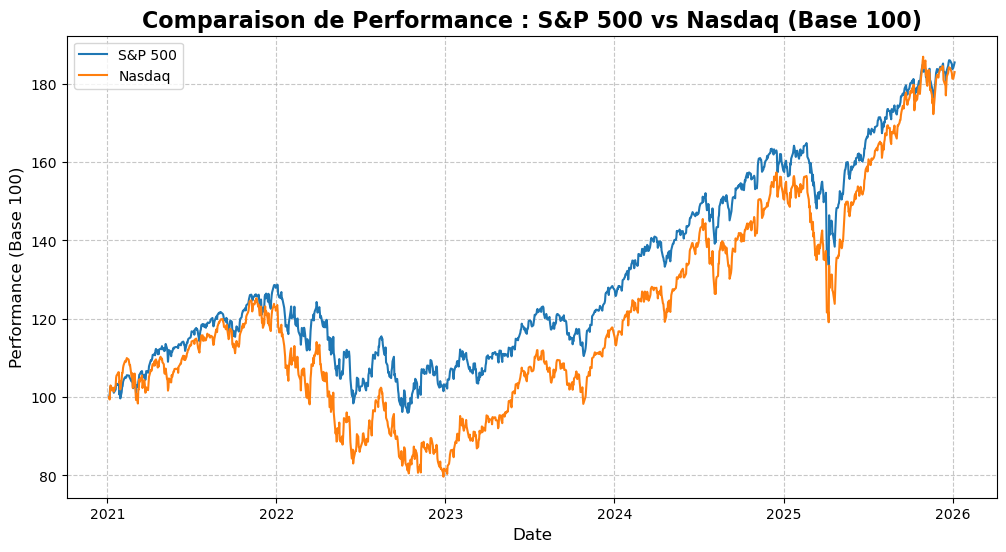

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. EXTRACTION (ETL) ---
print("Téléchargement des données...")
# Téléchargement des deux indices
data = yf.download(tickers=["^GSPC", "^IXIC"], period="5y", interval="1d")

# --- 2. TRANSFORMATION ---
# CORRECTION DU BUG :
# yfinance renvoie un tableau complexe. On doit d'abord extraire uniquement la colonne 'Close'.
# Cela va "aplatir" le tableau pour avoir juste les tickers en colonnes.
df_close = data['Close']

# On supprime les lignes vides
data_clean = df_close.dropna()

# Normalisation (Base 100) pour comparer la performance
# On divise chaque ligne par la première valeur (iloc[0]) et on multiplie par 100
data_normalized = (data_clean / data_clean.iloc[0]) * 100

# --- 3. VISUALISATION ---
plt.figure(figsize=(12, 6))

# Courbe 1 : S&P 500
plt.plot(data_normalized.index, data_normalized['^GSPC'], label='S&P 500', color='#1f77b4', linewidth=1.5)

# Courbe 2 : Nasdaq
plt.plot(data_normalized.index, data_normalized['^IXIC'], label='Nasdaq', color='#ff7f0e', linewidth=1.5)

# Mise en forme
plt.title("Comparaison de Performance : S&P 500 vs Nasdaq (Base 100)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Performance (Base 100)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()